# Daily

In [1]:
import numpy as np
import pandas as pd

In [2]:
starbucks = pd.read_csv('starbucks.csv')

In [3]:
starbucks.head(10)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10%,0%,30%,15%,75


In [4]:
total_entries = len(starbucks)
print("Total entries in 'starbucks':", total_entries)

Total entries in 'starbucks': 242


In [5]:
print(starbucks.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [6]:
print(starbucks.index)

RangeIndex(start=0, stop=242, step=1)


In [7]:
drink_sugar_avg = starbucks.groupby('Beverage')[' Sugars (g)'].mean()
max_sugar_drink = drink_sugar_avg.idxmax()
print(f"The drink with the most average sugar content is: {max_sugar_drink}")

The drink with the most average sugar content is: Java Chip (Without Whipped Cream)


In [8]:
num_drink_categories = starbucks['Beverage_category'].nunique()
print(f"There are {num_drink_categories} different drink categories.")

There are 9 different drink categories.


In [9]:
top_categories = starbucks['Beverage_category'].value_counts().head(5)
print("The 5 most frequent drink categories are:")
print(top_categories)

The 5 most frequent drink categories are:
Beverage_category
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          18
Name: count, dtype: int64


In [10]:
average_calories_per_category = starbucks.groupby('Beverage_category')['Calories'].mean()
print("Average calorie content per drink category:")
print(average_calories_per_category)

Average calorie content per drink category:
Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64


In [11]:
non_numeric_caffeine = starbucks[pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce').isna()]
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')

starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']
starbucks['caffeine_to_calories']


0      58.333333
1      65.000000
2      66.000000
3      82.000000
4       1.071429
         ...    
237     0.000000
238     0.000000
239     0.000000
240     0.000000
241     0.000000
Name: caffeine_to_calories, Length: 242, dtype: float64

In [12]:
average_caffeine_to_calories = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
highest_ratio_category = average_caffeine_to_calories.idxmax()

print("Category with the highest average 'caffeine_to_calories' ratio:", highest_ratio_category)


Category with the highest average 'caffeine_to_calories' ratio: Coffee


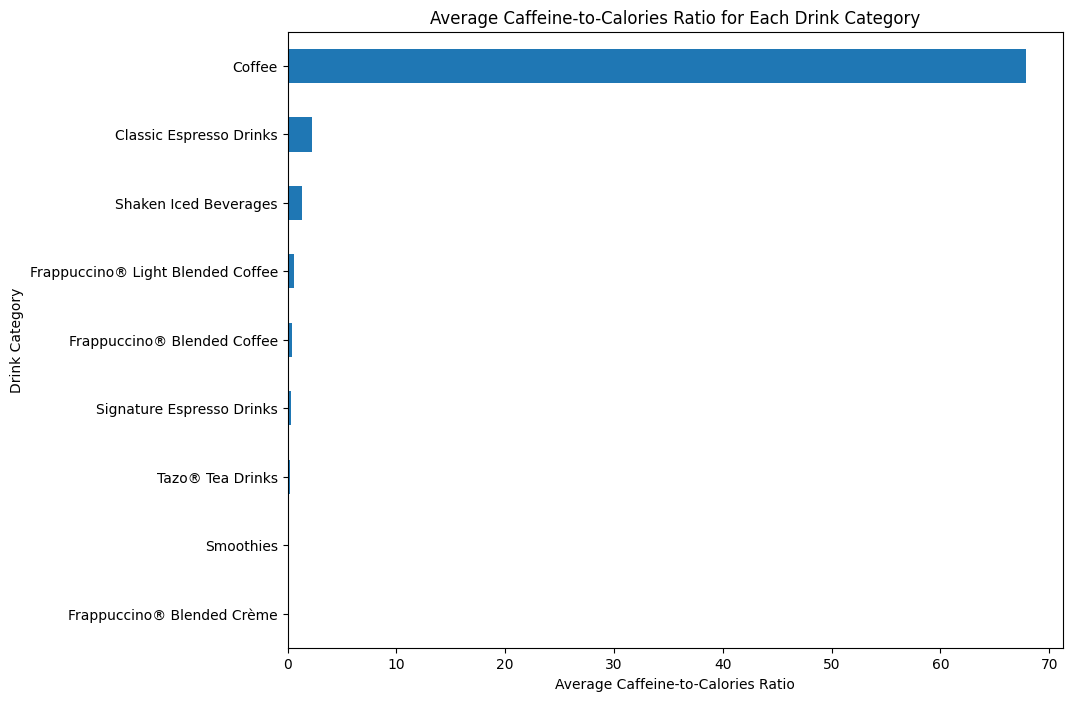

In [14]:
import matplotlib.pyplot as plt
average_caffeine_to_calories = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
plt.figure(figsize=(10, 8))
average_caffeine_to_calories.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Average Caffeine-to-Calories Ratio")
plt.ylabel("Drink Category")
plt.title("Average Caffeine-to-Calories Ratio for Each Drink Category")
plt.show()

# What is the relationship between sugar and caffeine content across different drink categories in the Starbucks dataset?

We can analyze the correlation between the ' Sugars (g)' and 'Caffeine (mg)' columns for each drink category. This will help us understand whether there's any significant relationship between the sugar content and caffeine content in different drink categories. 